### Assignment04-Task2: Use Twython to graph sentiment analysis on twitter

In [1]:
from twython import Twython
from textblob import TextBlob

def getAuthData():
    import csv
    with open('authdata.csv', 'r') as f:
        reader = csv.reader(f)
        your_list = list(reader)

    authdata = {}   
    for element in your_list:
        authdata[element[0]] = element[1]

    return authdata

In [13]:
def getTwythonData(SearchTerm,GeoCode,FileName):
    authdata = getAuthData()
    
    CONSUMER_KEY = authdata['CONSUMER_KEY']
    CONSUMER_SECRET = authdata['CONSUMER_SECRET']
    OAUTH_TOKEN = authdata['OAUTH_TOKEN']
    OAUTH_TOKEN_SECRET = authdata['OAUTH_TOKEN_SECRET']
    
    #get access to twitter api through oauth
    twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET,OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
    
    #use cursor to search 
    #use geocode to limit the search result to certain areas we want
    results = twitter.cursor(twitter.search,q=SearchTerm,geocode=GeoCode)
    tweet_count = 0
    tweet_texts = []
    for tweet in results:
        if tweet_count <= 1000:#limit the search tweets to 1000
            tweet_texts.append(str(tweet))
            tweet_count += 1
            
        else:
            break
    with open (FileName,'w') as f: #tranform the data we got to a file
        f.writelines(tweet_texts)

In [ ]:
getTwythonData('Trump','44.31,-85.60,500mi','Trump_michigan_twython.txt')
getTwythonData('Trump','39.13,-121.17,500mi','Trump_nevada_twython.txt')
getTweepyData('Trump','43.78,-88.79,500mi', "Trump_wisconsin_twython.txt")
getTwythonData('Trump', '40.42,-82.91,300mi',"Trump_ohio_twython.txt")
getTwythonData('Clinton','44.31,-85.60,500mi', "Clinton_michigan_twython.txt")
getTwythonData('Clinton','39.13,-121.17,500mi', "Clinton_nevada_twython.txt")
getTwythonData('Clinton','43.78,-88.79,500mi', "Clinton_wisconsin_twython.txt")
getTwythonData('Clinton','40.42,-82.91,300mi', "Clinton_ohio_twython.txt")

In [2]:
#clean the date
def remove_punctuation(s):
    punctuation = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
    s_sans_punct = ""
    for letter in s:
        if (letter not in punctuation) and (letter in "abcdefghijklmnopqrstuvwxyz"):
            s_sans_punct += letter
    return s_sans_punct

def getLowerCaseText(status_texts):
    lowered_texts = []
    for texts in status_texts:
        try: 
            mytext = str(texts.lower())
            lowered_texts.append(mytext)
        except:
            pass
    return lowered_texts

def remove_stopwords(lowered_texts):
    #self define stopword list
    stopwords=['as','and','the','to','of','in','you','because','so']
    #stop = stopwords.words('english') + ['rt', 'via']
    good_words=[]
    good_text= [text for text in lowered_texts if text not in stopwords]
    good_words.append(good_text)
    return good_words

def getCleanedTweets(good_words):
    cleanedTweets = []
    for text in good_words:
        wordlist = str(text).split()
        wordlist_nopun = [ str(remove_punctuation(for_a_word)) for for_a_word in wordlist ]
        cleanedTweets.append(wordlist_nopun)
    return cleanedTweets

def GetSentimentScores(cleanedTweets):
    sentiment = []
    for eachTweet in cleanedTweets:
        analysis = TextBlob(str(eachTweet))
        #use textblob's polarity to conduct sentiment analysis
        sentiment.append(analysis.sentiment.polarity)
    return sentiment

def getScore(FileName):
    with open(FileName,'r') as f:
        tweetTexts = f.readlines()
    lowered_texts = getLowerCaseText(tweetTexts)
    good_words = remove_stopwords(lowered_texts)
    cleanedTweets = getCleanedTweets(good_words)
    sentiment = GetSentimentScores(cleanedTweets)
    #get the average score
    #because the polarity's score is between -1 and 1, we transfer the score to 0-100
    score = sum(sentiment)/len(sentiment)*50+50
    return(score)

             Clinton      Trump
Michigan   40.345088  39.505964
Nevada     38.176361  40.615308
Wisconsin  38.634686  50.918756
Ohio       40.437415  40.961687


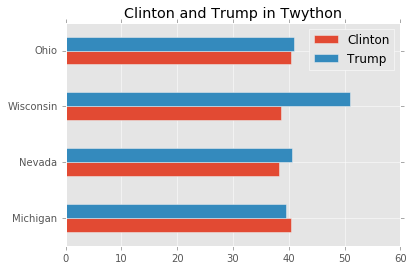

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

TM_twython = getScore('Trump_michigan_twython.txt')
TN_twython= getScore('Trump_nevada_twython.txt')
TW_twython = getScore('Trump_wisconsin_twython.txt')
TO_twython = getScore('Trump_ohio_twython.txt')
CM_twython = getScore('Clinton_michigan_twython.txt')
CN_twython = getScore('Clinton_nevada_twython.txt')
CW_twython = getScore('Clinton_wisconsin_twython.txt')
CO_twython = getScore('Clinton_ohio_twython.txt')

#use dictionary to create data frame of scores
data = {"Trump":[TM_twython,TN_twython,TW_twython,TO_twython],"Clinton":[CM_twython,CN_twython,CW_twython,CO_twython]}
dfScore2 = pd.DataFrame(data,index=["Michigan","Nevada","Wisconsin","Ohio"])
print(dfScore2)

%matplotlib inline
matplotlib.style.use('ggplot') 
#create bars of scores
dfScore2.plot(kind="barh")
plt.title("Clinton and Trump in Twython")